In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999



def single_bar_chart(chart_title, data_series):
    """
    Docstring describing what the function does.

    Args:
        parameter (type): Description of the parameter.

    Returns:
        return_type: Description of what is returned.
    """
    
    ct = f"{chart_title} (n={segments.sum()})"
    
    # Create the figure with stacked bars
    fig = go.Figure(data=[
        go.Bar(name='Work', x=segments.index, y=segments.values)
        ])


    # Update the layout to stack the bars
    fig.update_layout(
        barmode='stack',
        title=ct,
        plot_bgcolor="#FFFFFF",
        xaxis={'categoryorder':'total descending'})

    # Show the plot
    fig.show()

    
def double_bar_chart(chart_title, ds1_name, data_series_1, ds2_name, data_series_2):
    """
    Docstring describing what the function does.

    Args:
        parameter (type): Description of the parameter.

    Returns:
        return_type: Description of what is returned.
    """
    
    ct = f"{chart_title} (n={data_series_1.sum()+data_series_2.sum()})"
    
    # Create the figure with stacked bars
    fig = go.Figure(data=[
        go.Bar(name=ds1_name, x=data_series_1.index, y=data_series_1.values),
        go.Bar(name=ds2_name, x=data_series_2.index, y=data_series_2.values)
    ])


    # Update the layout to stack the bars
    fig.update_layout(
        barmode='stack',
        title=ct,
        plot_bgcolor="#FFFFFF",
        xaxis={'categoryorder':'total descending'})

    # Show the plot
    fig.show()
    

In [17]:
FILENAME = "raw-data-102624.xlsx"

raw_df = pd.read_excel(FILENAME, engine="openpyxl")

#drop columns we don't care about
raw_df.drop (columns=['#', "Response Type", "Start Date (UTC)", "Stage Date (UTC)", "Submit Date (UTC)", "Network ID", "Tags"], inplace=True)

#rename columns

raw_df.rename( columns=
              {
                'Where do you mostly use Portainer; at home or at work?': 'Q1',
                'What industry segment does your organization most closely align with?' : 'Q2',
                'Other' : 'Q2Other',
                'How many staff does your organization employ?': 'Q3', 
                'What is your organization’s annual revenue?' : 'Q4',
                'How many years has your organization been using container technology?' : 'Q5',
                'How many years has your organization been using CI/CD ?' : 'Q6',
                'How many years has your organization been using GitOps?' : 'Q7',
                'What is your current role?' : 'Q8',
                'Other.1' : 'Q8Other',
                'How many years of professional experience in IT do you have?' : 'Q9',
                'Which country are you located in?' : 'Q10',
                'What use cases do you primarily use container technology for?' : 'Q11'
              },
              inplace=True)

#change some types to make things easier

raw_df['Q1'] = raw_df['Q1'].astype('category')
raw_df['Q2'] = raw_df['Q2'].astype('category')
raw_df['Q3'] = raw_df['Q3'].astype('category')




raw_df.head()


/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



,Q1,Q2,Q2Other,Q3,Q4,Q5,Q6,Q7,Q8,Q8Other,Q9,Q10,Q11,Home Lab,Web,Mobile backend,Machine Learning,Data Analytics,IIoT (Industrial IoT),IoT (Internet of Things),Gaming,Other.2,Portability,Access to pre-packaged software,Increased Developer Productivity,Cost Reduction,Enhanced Scalability,Isolation and Security,Enhanced scalability,Other.3,Security,Complexity,Lack of skills,Changes in operational routines,Other.4,Docker,Docker Swarm,Podman,Amazon Elastic Container Services (ECS),Azure Container Instances,"If there are any other container related technologies that your software will be dependent on now or in 2 years, please detail them here.",Does your organization have a dedicated Platform Engineering team or plan to have one in the future?,Do you currently use or plan to use Kubernetes?,Rancher RKE2,Rancher K3S,Mirantis Docker Enterprise,Red Hat OpenShift Container Platform (OCP),Red Hat OKE (OKE),Platform9,Linode Kubernetes Engine (LKE),Ubuntu MicroK8s,Ubuntu Charmed Kubernetes,Talos Kubernetes,"If there are any other Kubernetes distributions (self-managed) that were not on the previous list that you use or plan to use, please detail them here.",Red Hat OpenShift Online,Azure Red Hat OpenShift (ARHO),Red Hat OpenShift Service on AWS (ROSA),Red Hat OpenShift Dedicated (OSD),Red Hat OpenShift on IBM Cloud,VMWare Tanzu Kubernetes Grid,Amazon Elastic Kubernetes Services (EKS),Google Kubernetes Engine (GKE),Linode Kubernetes Engine (LKE).1,Alibaba Cloud Container Service for Kubernetes (ACK),DigitalOcean Kubernetes (DOKS),IBM Cloud Kubernetes Service (IKS),Oracle Kubernetes Engine (OKE),Civo Kubernetes,"If there are any other Kubernetes managed services that were not on the previous list that you use or plan to use, please detail them here.",Helm,Kustomize,Managed Kubernetes offering,Buildpacks,Porter,CNAB,Other.5,Red Hat Advanced Cluster Management,Red Hat Advanced Cluster Security,Rancher,Rancher Prime,Portainer,Lens,Cyclops,"If there are any other Kubernetes multi-cluster management tools that were not on the previous list that you use or plan to use, please detail them here.",WASM,Open Policy Agent (OPA),Rego,KubeEdge,SBOM - CycloneDX,SBOM - SPDX,Argo,Flux,KubeFlow,Backstage,Cilium,Istio,Prometheus,Jaeger,LinkerD,Karmada,OpenFeature,OpenTelemetry,"If there are any other emerging cloud-native tools or technologies that were not on the previous list that you use or plan to use, please detail them here.",Thanks for sharing your insights with us. If you would like us to share the results with you please provide your email address:
0,At home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Software Architect,NaN,More than 10 years,Germany,Installing containerized open source software,Home Lab,Web,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Access to pre-packaged software,NaN,NaN,NaN,Isolation and Security,NaN,NaN,NaN,Complexity,NaN,Changes in operational routines,NaN,"Now,In 2 Years",NaN,NaN,NaN,NaN,NaN,We have no plans for a Platform Engineering team,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,At home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SRE / DevOps Engineer,NaN,6-10 years,United Kingdom,Installing containerized open source software,Home Lab,Web,NaN,NaN,NaN,NaN,IoT (Internet of Things),Gaming,NaN,Portability,Access to pre-packaged software,NaN,NaN,Enhanced Scalability,Isolation and Security,NaN,NaN,NaN,NaN,NaN,Changes in operational routines,NaN,In 2 Years,In 2 Years,NaN,NaN,NaN,NaN,We have no plans for a Platform Engineering team,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,At home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hobby homelab runner,No Experience,Germany,Installing cont

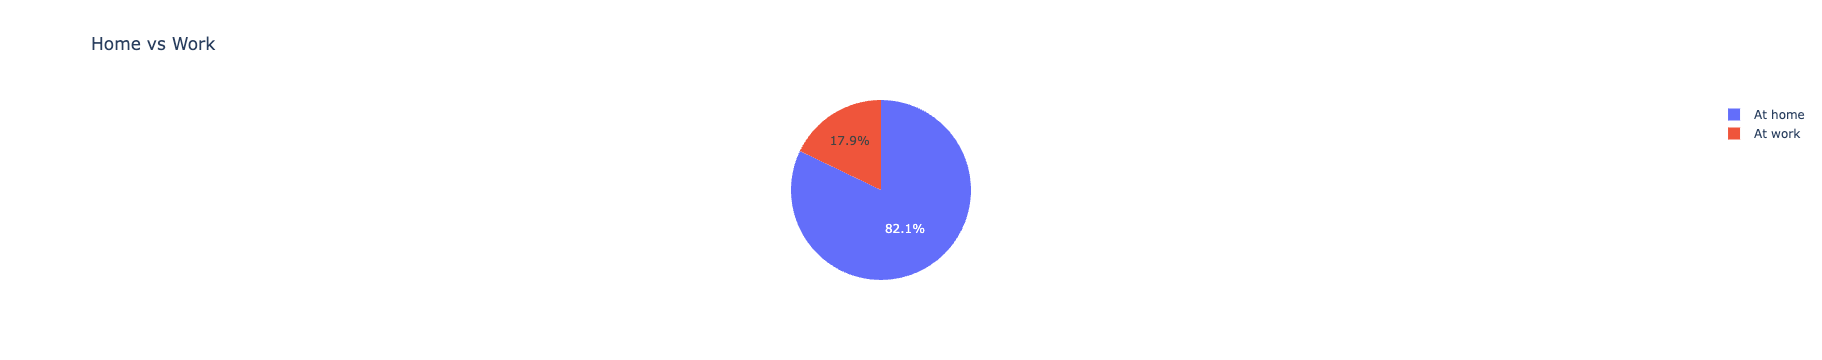

In [18]:
# Q1 - home or work ?
#

temp_series = raw_df['Q1'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series)))


trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Home vs Work'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="home-work")


In [19]:
# split into two data sets depending on Home or Work usage

home = "At home"
work = "At work"

home_df = raw_df.query("`Q1` == @home").copy()
work_df = raw_df.query("`Q1` == @work").copy()

# ignore category data less than this threshold
THRESHOLD = 4 

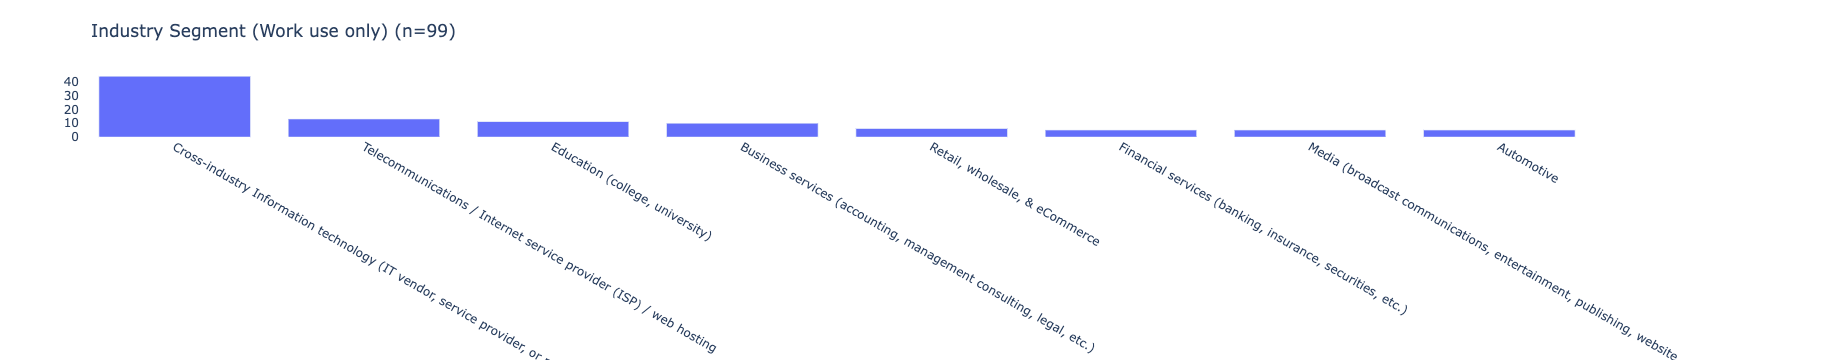

In [20]:
#
# Question 2 - 'What industry segment does your organization most closely align with?'
#
# Not interest in Home users 

# Anything interesting in Other ?
#value_counts = work_df['Q2Other'].value_counts()
#print (value_counts)


#drop low count categories, draw bar-chart
segments = work_df['Q2'].value_counts()[lambda x: x > THRESHOLD]
single_bar_chart ( "Industry Segment (Work use only)", segments )



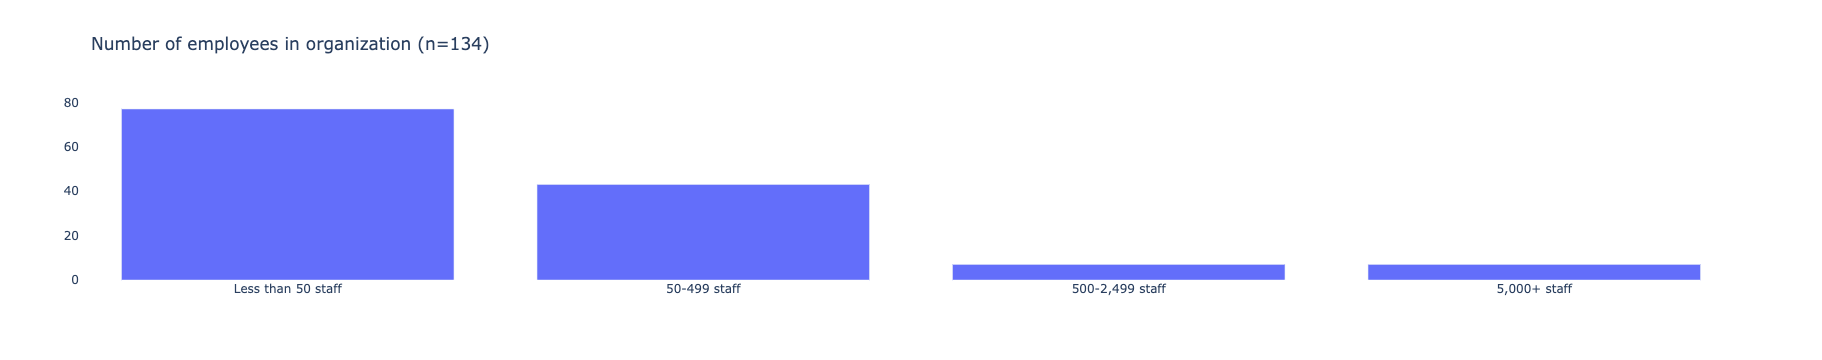

In [21]:
#
# Question 4 - 'How many staff does your organization employ?'
#

#drop low count categories, draw bar-chart
segments = work_df['Q3'].value_counts()[lambda x: x > THRESHOLD]
single_bar_chart ( "Number of employees in organization", segments )


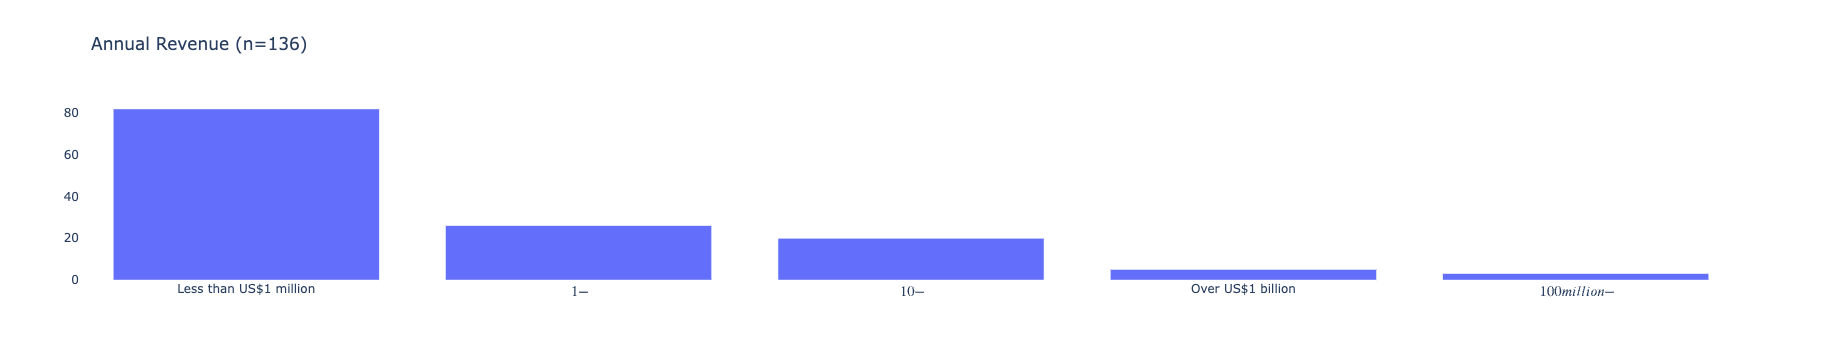

In [22]:
#
# Question 4 - 'What is your organization’s annual revenue?' 
#

#drop low count categories, draw bar-chart
segments = work_df['Q4'].value_counts()[lambda x: x > 0]
single_bar_chart ( "Annual Revenue", segments )

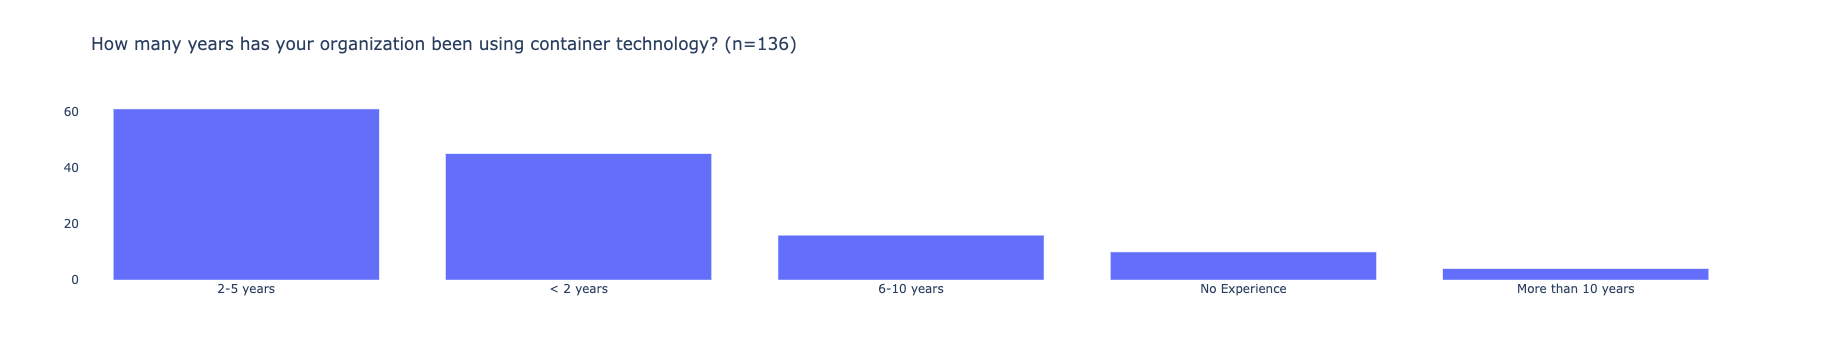

In [23]:
#
# Question 5 - How many years has your organization been using container technology?


double_bar_chart("How many years has your organization been using container technology?", 
                 "Work", work_df['Q5'].value_counts()[lambda x: x > 0], 
                 "Home", home_df['Q5'].value_counts()[lambda x: x > 0])
#

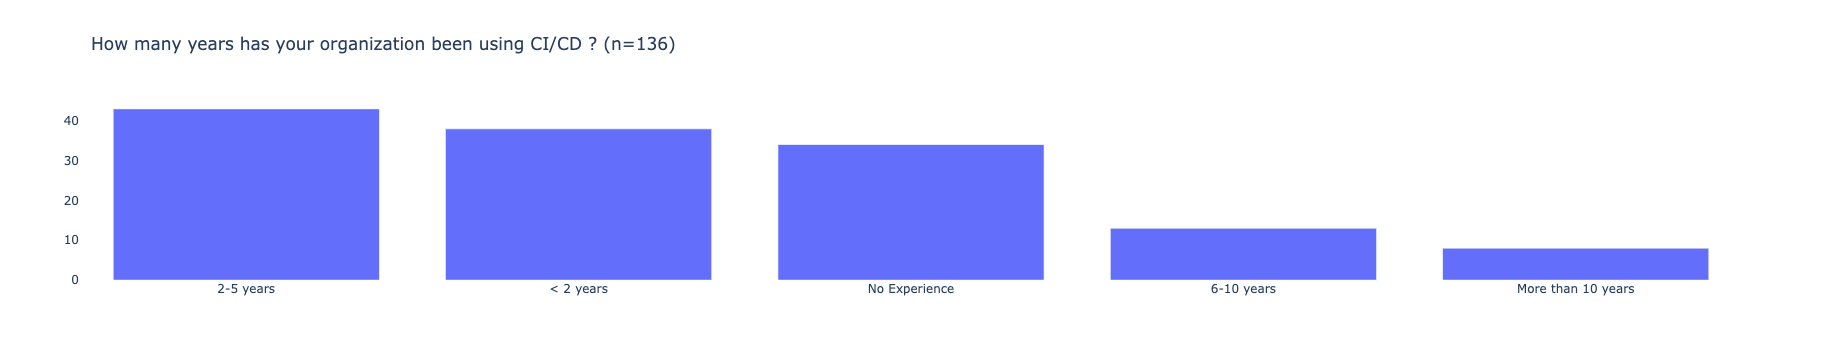

In [24]:
#
# Question 6 - How many years has your organization been using CI/CD ?
#

double_bar_chart("How many years has your organization been using CI/CD ?", 
                 "Work", work_df['Q6'].value_counts()[lambda x: x > 0], 
                 "Home", home_df['Q6'].value_counts()[lambda x: x > 0])
#

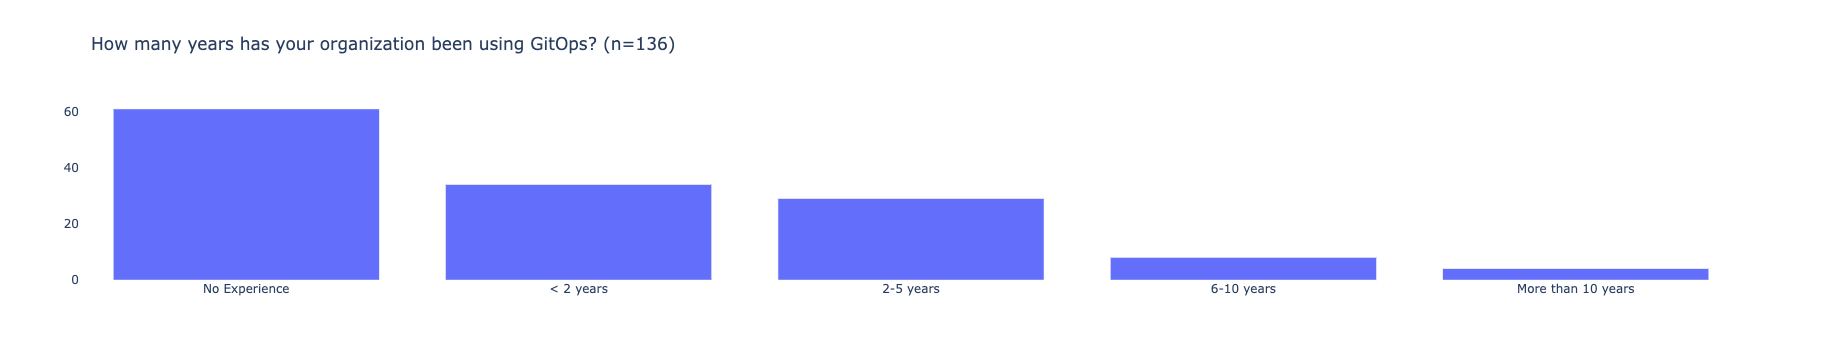

In [25]:
#
# Question 7 - How many years has your organization been using GitOps?
#
double_bar_chart("How many years has your organization been using GitOps?", 
                 "Work", work_df['Q7'].value_counts()[lambda x: x > 0], 
                 "Home", home_df['Q7'].value_counts()[lambda x: x > 0])


In [26]:
#
# Question 8 - 
#

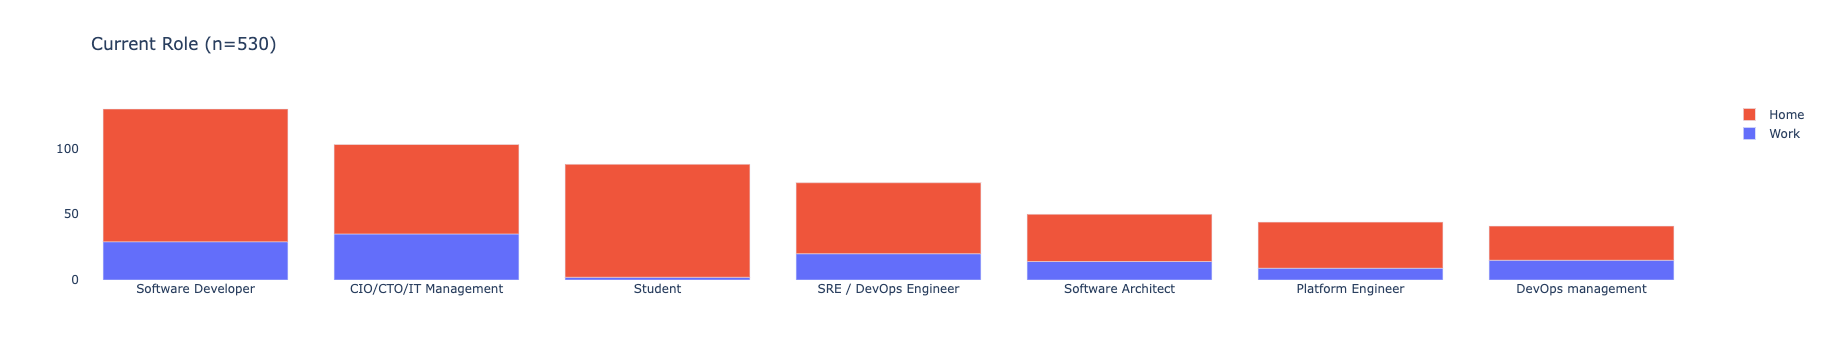

In [27]:
#
# Question 8 - 'What is your current role?'
#

# Anything interesting in Other ?

# value_counts = work_df['Q8Other'].value_counts()
# print (value_counts)

# value_counts = home_df['Q8Other'].value_counts()
# print (value_counts)

h_roles = home_df['Q8'].value_counts()
w_roles = work_df['Q8'].value_counts()

double_bar_chart("Current Role", 
                 "Work", work_df['Q8'].value_counts()[lambda x: x > 0], 
                 "Home", home_df['Q8'].value_counts()[lambda x: x > 0])



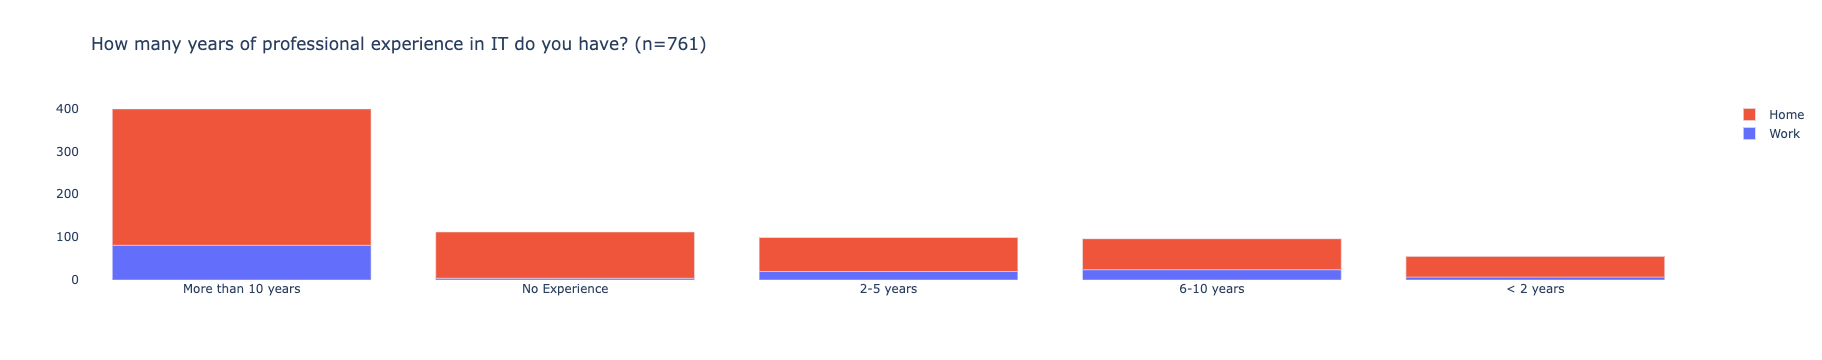

In [28]:
#
# Question 9 - HHow many years of professional experience in IT do you have?
#
double_bar_chart("How many years of professional experience in IT do you have?", 
                 "Work", work_df['Q9'].value_counts()[lambda x: x > 0], 
                 "Home", home_df['Q9'].value_counts()[lambda x: x > 0])


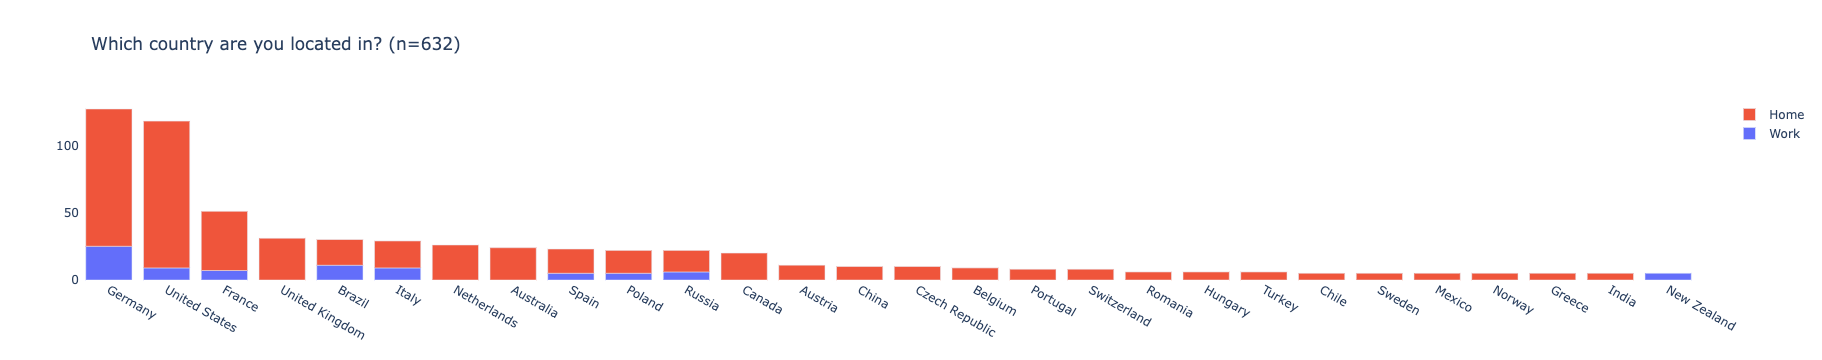

In [29]:
#
# Question 10 - Which country are you located in?
#
double_bar_chart("Which country are you located in?", 
                 "Work", work_df['Q10'].value_counts()[lambda x: x > THRESHOLD], 
                 "Home", home_df['Q10'].value_counts()[lambda x: x > THRESHOLD])

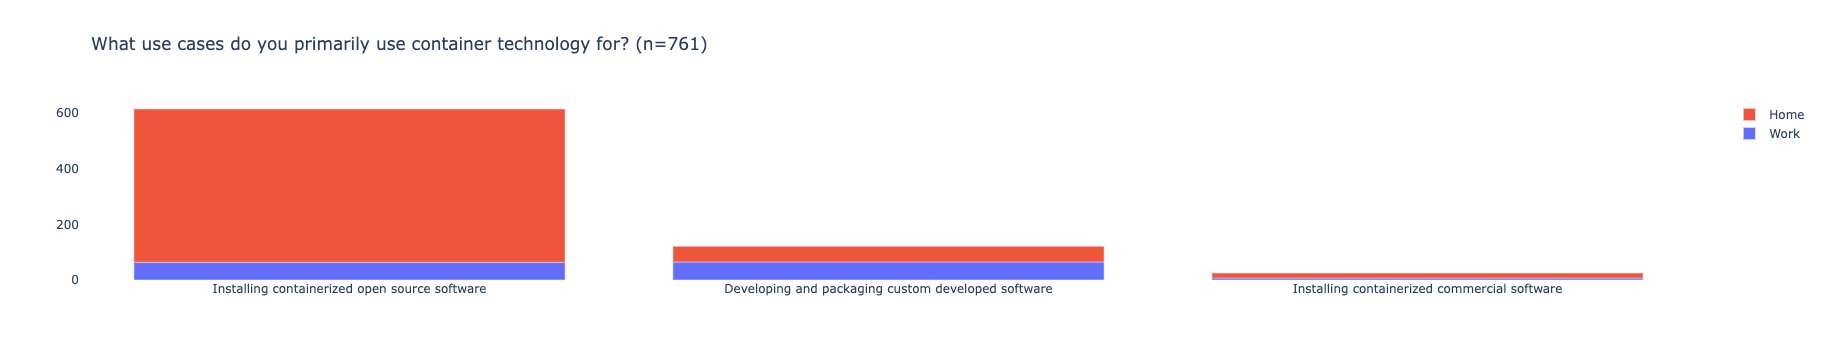

In [30]:
#
# Question 11 - What use cases do you primarily use container technology for?
#
double_bar_chart("What use cases do you primarily use container technology for?", 
                 "Work", work_df['Q11'].value_counts()[lambda x: x > 0], 
                 "Home", home_df['Q11'].value_counts()[lambda x: x > 0])